<h1 style="color:red"><center>Fuel Consumption</center></h1>

![title](https://iea.imgix.net/3dd6d12c-e2bb-45a7-87a8-9de52cc087c5/shutterstock_346133240.jpg?auto=compress%2Cformat&fit=min&q=80&rect=0%2C0%2C3000%2C2000&w=1800&h=1200&fit=crop&fm=jpg&q=70&auto=format)

<h2 style="color:brown">About Data</h2>

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

![title](https://www.researchgate.net/profile/Julia-Bergmann-4/publication/337166847/figure/fig3/AS:824066491559942@1573484170571/Cross-Industry-Standard-Process-for-Data-Mining-CRISP-DM-in-the-style-of-Chapman-et.png)

<h2 style="color:brown">Content :</h2>

<a href="#1"><h3>1.Busniess Understanding</h3></a>

<a href="#2"><h3>2.Data Understanding</h3></a>

<a href="#3"><h3>3.Data Prepartion</h3>

<a href="#4"><h3>4.Modelling</h3>
    
<a href="#5"><h3>5.Evaluation</h3>
        

<h3 style="color:brown">Busniess Understanding :</h3>

We have to find the fuel consumption of the vehciles based on the features

<h3 style="color:brown">Data Understanding :</h3>

<a href="#2.1"><h5 style="color:skyblue">2.1 Importing Libiraries</h5></a>

In [1]:
# To satitical operation
import pandas as pd
import numpy as np  

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


<a href="#2.2"><h5 style="color:skyblue">2.2 Load Data</h5></a>

In [2]:
df=pd.read_csv("MY2022 Fuel Consumption Ratings.csv")
df.head(3)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


<a href="#2.3"><h5 style="color:skyblue">2.3 EDA </h5></a>

In [3]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [4]:
df.rename(columns={"Fuel Consumption (City (L/100 km)":"city"},inplace=True)

In [5]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'city',
       'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))',
       'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [6]:
# Checking the dimension
df.shape

(946, 15)

946 Records and 15 Features

In [7]:
# Listing the Total features
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'city',
       'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))',
       'Fuel Consumption(Comb (mpg))', 'CO2 Emissions(g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [8]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
city                                 149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

**No of Unique Values in the each feature are listed above**

In [9]:
# For Unique Values in the Features
print("The Total Unique values in fetaures")
print(df.nunique())
for i in df.columns:
    x=df[i].unique()
    print("The Title :{}".format(i))
    print("Unique values :{}",format(x))
    print()
    print("*"*90)
    print()

The Total Unique values in fetaures
Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
city                                 149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64
The Title :Model Year
Unique values :{} [2022]

******************************************************************************************

The Title :Make
Unique values :{} ['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'H

The Title :CO2 Emissions(g/km)
Unique values :{} [200 263 232 242 230 231 256 261 205 217 271 218 226 288 324 343 270 178
 190 208 214 224 234 248 215 233 220 252 273 322 356 267 268 319 315 360
 206 227 254 323 262 325 235 209 309 383 287 379 294 395 373 195 202 219
 279 321 212 293 292 296 301 211 354 213 207 241 364 302 199 223 522 608
 277 201 184 185 221 216 239 244 297 303 222 260 258 346 281 345 353 225
 237 269 259 251 355 349 257 283 326 329 198 175 274 240 341 314 304 306
 328 272 265 298 347 380 358 327 359 339 361 381 352 385 366 165 170 332
 336 197 289 249 307 305 368 331 363 275 291 308 310 317 238 182 136 139
 282 300 284 295 344 357 370 313 228 147 236 246 392 229 245 318 338 168
 176 117 129 166 167 186 162 180 189 181 193 179 158 151 103  99  94 174
 187 250 183 194 152 253 247 286 299 290 266 374 204 255 285 387 169 110
 124 159 157 280 489 498 371 384 350 365 337 140 311 348 243 264 210 177
 191 143 362 188 196 171 276 278 334 335 330 320 465 386 382 192 113 121
 1

In [10]:
# Checking data types of features
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
city                                 float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

**We have 5 Categorial Features in our dataset**

In [11]:
# Check For Null values
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
city                                 0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   city                               946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [13]:
df.describe()

,Model Year,Engine Size(L),Cylinders,city,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [14]:
# Segerating the Object type and Numerical type columns
obj=[]
num=[]
for i in df.columns:
    if type(df[i][0])==str:
        obj.append(i)
    else:
        num.append(i) 

In [15]:
print("________________The Object Type Columns_______________")
obj

________________The Object Type Columns_______________


['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [16]:
print("_________________The Int Type Columns___________________")
num

_________________The Int Type Columns___________________


['Model Year',
 'Engine Size(L)',
 'Cylinders',
 'city',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating']

**Let Understand by visualization**

<h6 style="color:red">Make</h6>

In [17]:
df["Make"].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [18]:
len(df[df["Make"]=="Acura"])

8

In [19]:
Makelen=[]
for i in df["Make"].unique():
    x=len(df[df["Make"]==i])
    Makelen.append(x)

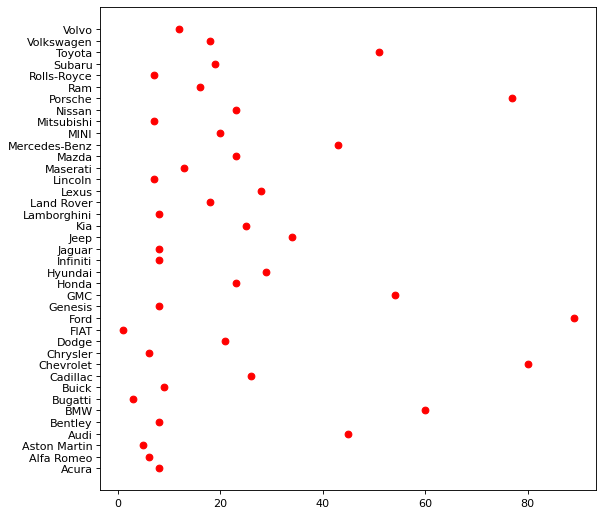

In [20]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Makelen,df["Make"].unique(),c="red")
plt.show()

**Observation :**
In our Dataset More vehicles are ford and Less Vehicles are Flat

<h6 style="color:red">Fuel Type</h6>

In [21]:
df["Fuel Type"].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [22]:
Fuel=[]
for i in df["Fuel Type"].unique():
    x=len(df[df["Fuel Type"]==i])
    Fuel.append(x)

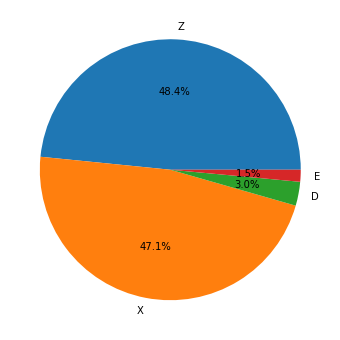

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(x=Fuel,labels=df["Fuel Type"].unique(),autopct='%1.1f%%')
plt.show()

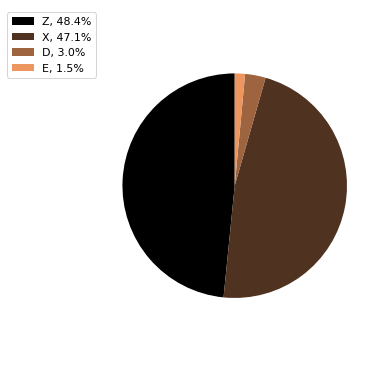

In [24]:
sizes = Fuel
labels = df["Fuel Type"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observation**
Z Type fuel is higher in dataset

<h6 style="color:red">Transmission</h6>

In [25]:
df["Transmission"].unique()

array(['AM8', 'AS10', 'A8', 'A9', 'AM7', 'AS8', 'M6', 'AS6', 'AV', 'AS9',
       'A10', 'A6', 'M5', 'M7', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8', 'AV6',
       'AV10', 'AS5', 'A7'], dtype=object)

In [26]:
Trans=[]
for i in df["Transmission"].unique():
    x=len(df[df["Transmission"]==i])
    Trans.append(x)

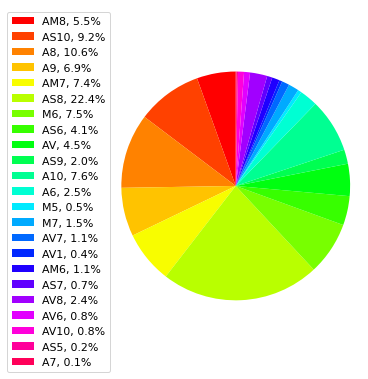

In [27]:
sizes = Trans
labels = df["Transmission"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('hsv')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observation**
 - A8 Transmission Vehicles are 10.6 and AS10 are 9.2

<h6 style="color:red">Vehicle Class</h6>

In [28]:
df["Vehicle Class"].unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

In [29]:
Vehclass=[]
for i in df["Vehicle Class"].unique():
    x=len(df[df["Vehicle Class"]==i])
    Vehclass.append(x)


In [30]:
Vehclass

[69, 197, 117, 48, 141, 51, 80, 19, 8, 64, 20, 113, 7, 12]

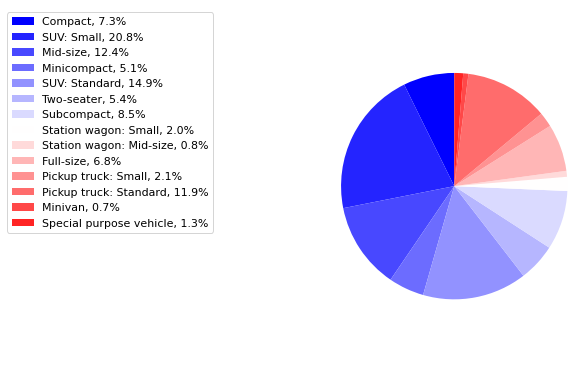

In [31]:
sizes = Vehclass
labels = df["Vehicle Class"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observation**
- SUV small are 20.8
- SUV standard are 14.9
- pickup truck Standard 11.9

<h6 style="color:blue">Model</h6>

In [32]:
df["Model"].unique()

array(['ILX', 'MDX SH-AWD', 'RDX SH-AWD', 'RDX SH-AWD A-SPEC',
       'TLX SH-AWD', 'TLX SH-AWD A-SPEC', 'TLX Type S',
       'TLX Type S (Performance Tire)', 'Giulia', 'Giulia AWD',
       'Giulia Quadrifoglio', 'Stelvio', 'Stelvio AWD',
       'Stelvio AWD Quadrifoglio', 'DB11 V8', 'DB11 V12', 'DBS V12',
       'DBX V8', 'Vantage V8', 'A3 Sedan 40 TFSI quattro',
       'A4 Sedan 40 TFSI quattro', 'A4 Sedan 45 TFSI quattro',
       'A4 allroad 45 TFSI quattro', 'A5 Cabriolet 45 TFSI quattro',
       'A5 Coupe 45 TFSI quattro', 'A5 Sportback 45 TFSI quattro',
       'A6 Sedan 45 TFSI quattro', 'A6 Sedan 55 TFSI quattro',
       'A6 allroad 55 TFSI quattro', 'A7 Sportback 55 TFSI quattro',
       'A8 L Sedan 55 TFSI quattro', 'Q3 40 TFSI quattro',
       'Q3 45 TFSI quattro', 'Q5 40 TFSI quattro', 'Q5 45 TFSI quattro',
       'Q5 Sportback 45 TFSI quattro', 'Q7 45 TFSI quattro',
       'Q7 55 TFSI quattro', 'Q8 55 TFSI quattro', 'R8 Coupe Performance',
       'R8 Coupe Performance quatt

In [33]:
Modells=[]
for i in df["Model"].unique():
    x=len(df[df["Model"]==i])
    Modells.append(x)

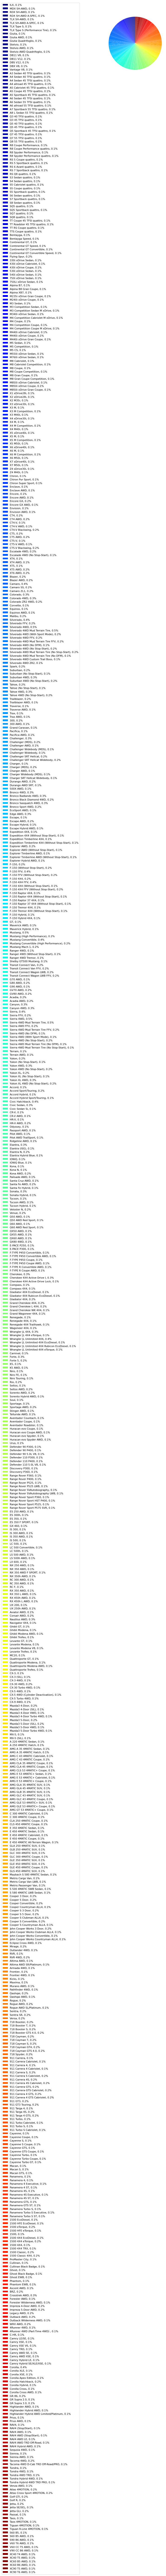

In [34]:
sizes = Modells
labels = df["Model"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('jet')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

<h6 style="color:red">vehicle class with fuel consumption</h6>

In [35]:
df["Vehicle Class"].unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

In [36]:
df[df["Vehicle Class"]=="Compact"]['Fuel Consumption(Comb (L/100 km))'].mean()

8.840579710144926

In [37]:
vcm=[]
for i in df["Vehicle Class"].unique():
    meen = df[df["Vehicle Class"]==i]['Fuel Consumption(Comb (L/100 km))'].mean()
    vcm.append(meen)

In [38]:
vcm

[8.840579710144926,
 9.780710659898483,
 9.805128205128208,
 11.960416666666665,
 12.8113475177305,
 13.139215686274513,
 10.6175,
 8.205263157894736,
 12.2,
 10.920312500000001,
 11.135,
 13.601769911504425,
 9.671428571428573,
 10.774999999999999]

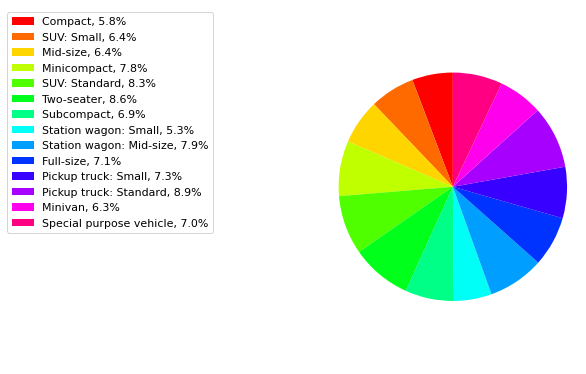

In [39]:
sizes = vcm
labels = df["Vehicle Class"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('hsv')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observation:**
 - PickUp truck Standard consuming more Fuel 8.9
 - SUV 8.3
 - Two setter 8.6

<h6 style="color:red">Transmission</h6>

In [40]:
tsm=[]
for i in df["Transmission"].unique():
    meen = df[df["Transmission"]==i]['Fuel Consumption(Comb (L/100 km))'].mean()
    tsm.append(meen)

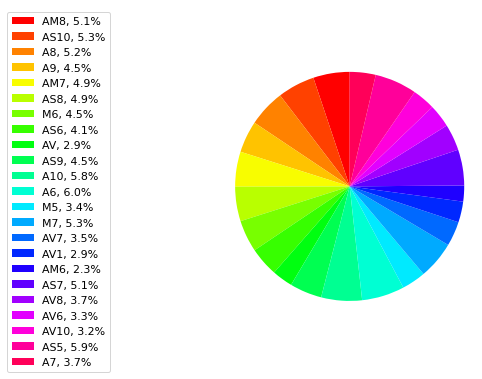

In [41]:
sizes = tsm
labels = df["Transmission"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('hsv')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observation**
- A6 Transmission consumnes high 6.0%

<h6 style="color:red">Fuel Type</h6>

In [42]:
ft=[]
for i in df["Fuel Type"].unique():
    meen = df[df["Fuel Type"]==i]['Fuel Consumption(Comb (L/100 km))'].mean()
    ft.append(meen)

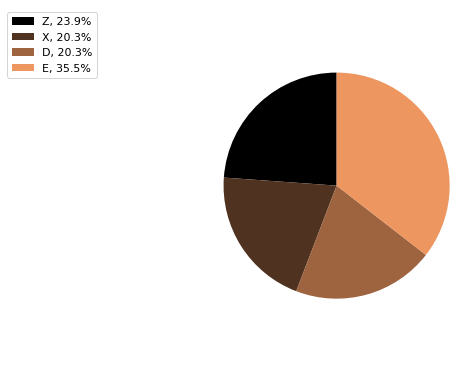

In [43]:
sizes = ft
labels = df["Fuel Type"].unique()
 
fig1, ax1 = plt.subplots(figsize=(5, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('copper')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

**Observaion**
- 35.5 percentage of Fuel is E

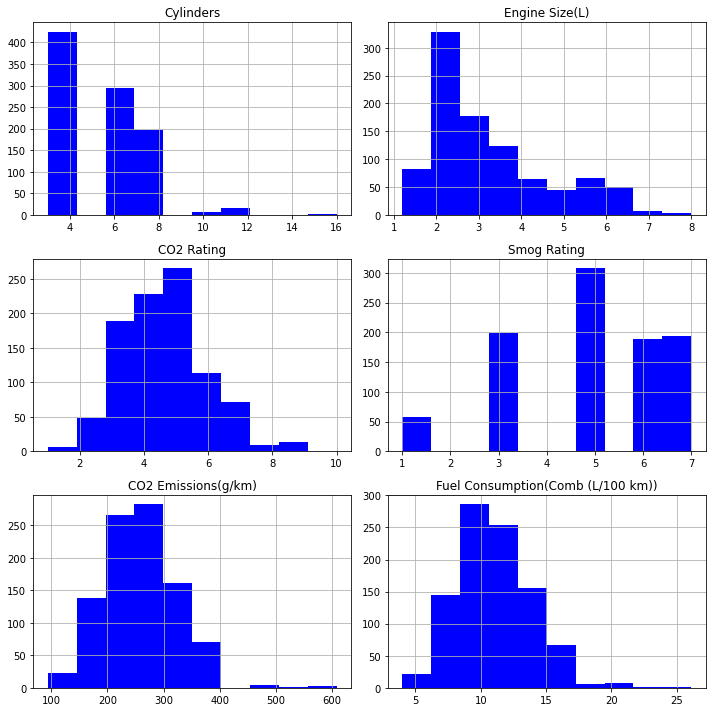

In [44]:
vizual = df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
vizual.hist(color = 'blue', figsize = (10, 10))
plt.tight_layout();
plt.show();

In [45]:
# Note :
'''The first (and most common) reference is litres per 100km (litres/100km). 
This is how many litres of fuel the car needs in order to travel 100km.'''

'The first (and most common) reference is litres per 100km (litres/100km). \nThis is how many litres of fuel the car needs in order to travel 100km.'

In [46]:
df.head(1)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,city,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3


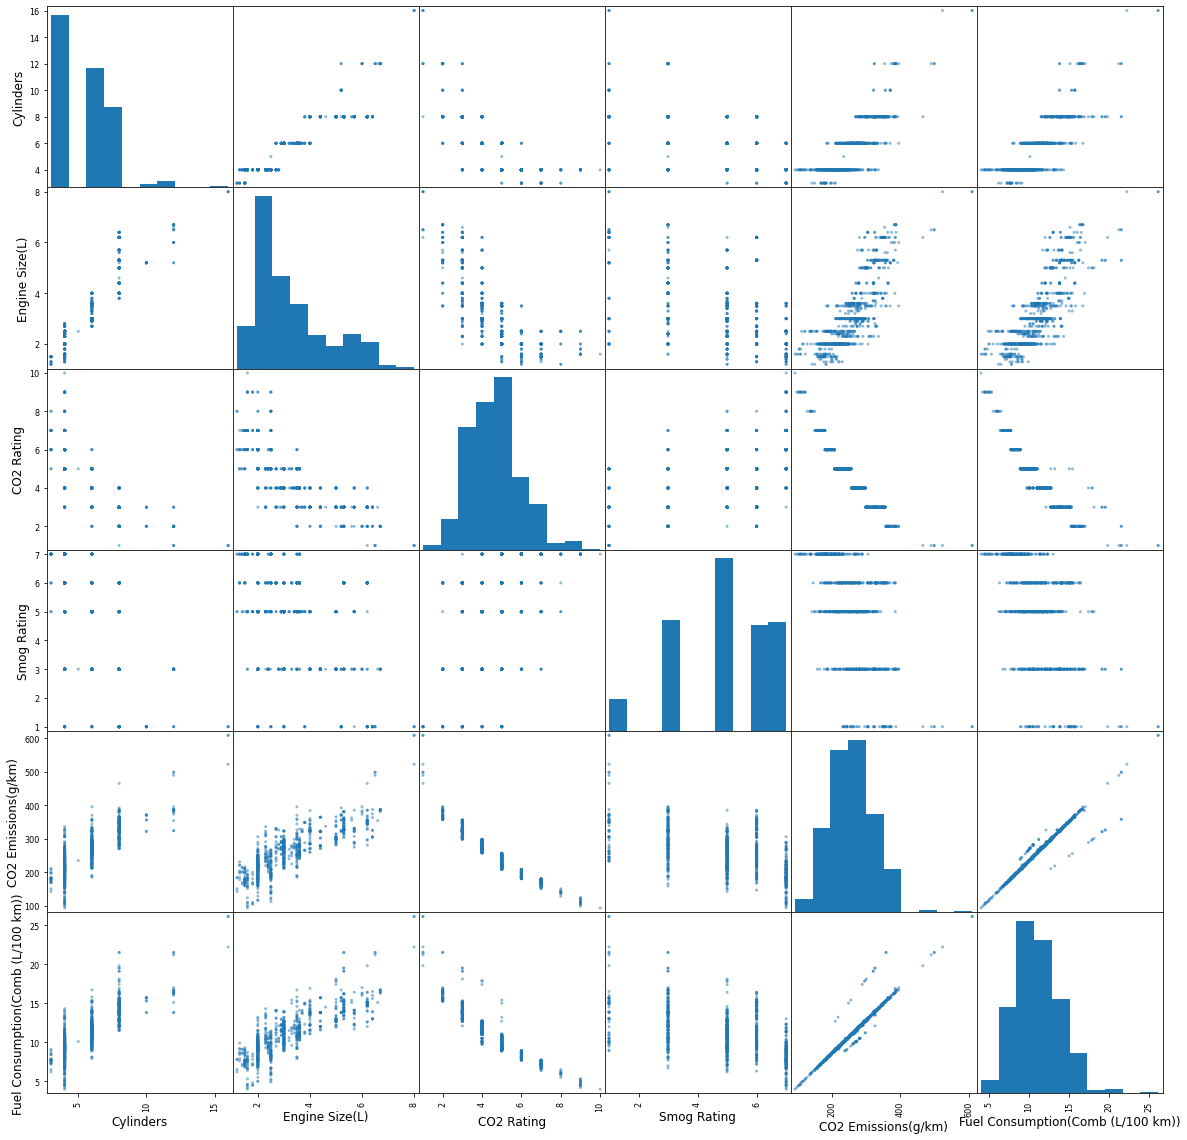

In [47]:
from pandas.plotting import scatter_matrix
#set font of all elements to size 15
plt.rc('font', size=12)
scatter_matrix(df[['Cylinders','Engine Size(L)','CO2 Rating', 'Smog Rating','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']], figsize=(20, 20))
plt.tight_layout;
plt.show()

**Observations :**
  -  No of Cylinders increases Fuel consumption also increases, if 15 cylinders it take 25 liters for 100km and 5 to 10 cylinders means it consume near 5 to 17 liters.
  - Engine Size increases Fuel consumption also increases
  - Full consumption is less means Co2 Rating is Good
  - Full consumption is less then Smog Rating is Good
  - Full consumption increases Co2 emission in also Increases in Gram/km

In [48]:
correc=df.corr()
correc

,Model Year,Engine Size(L),Cylinders,city,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
city,NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


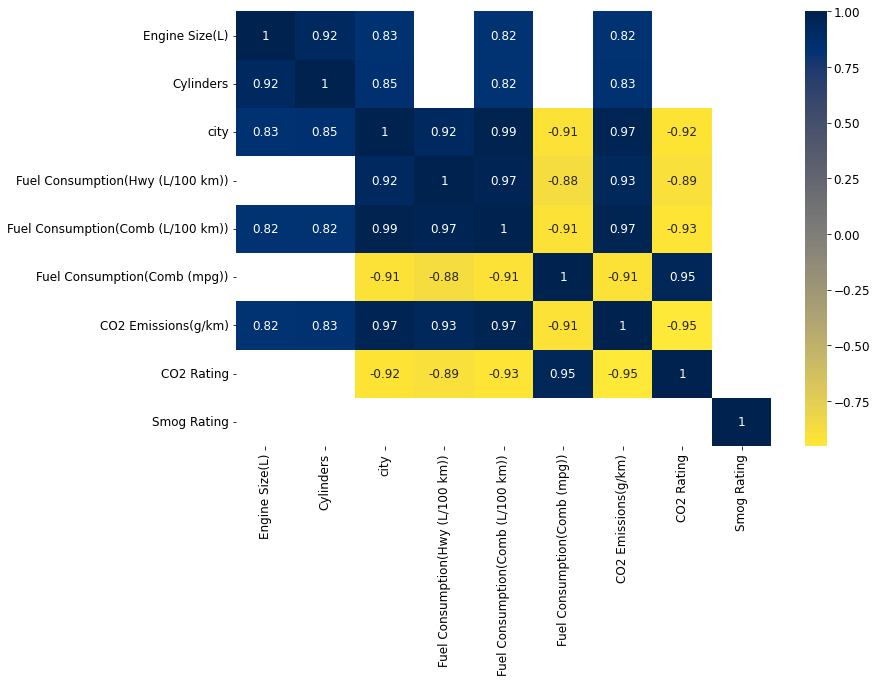

In [49]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

**Observation :**
- Co2 Emission and Cylinders have High correlation to FuelConsumption
- Engine Size and Co2 has same coorelation 0.82 so I negleted Engine size

<h3 style="color:brown">Data Processing</h3>

In [50]:
df_copy=df.copy()

In [51]:
df_copy

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,city,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [52]:
# checking for Null Values
df_copy.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
city                                 0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

**Note**
- No Null Values in our dataset

### **Label Encoding**
Some features in this dataset are categorical such as Vehicle Class,Transmission, and Fuel Type. Unfortunately, Sklearn models do not handle categorical variables. To convert these features to numerical values, LabelEncoder from sklearn.preprocessing can be used to convert categorical variable into dummy/indicator variables.

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['Vehicle Class'] = le.fit_transform(df_copy['Vehicle Class'])
df_copy['Transmission'] = le.fit_transform(df_copy['Transmission'])
df_copy['Fuel Type'] = le.fit_transform(df_copy['Fuel Type'])

In [54]:
corr = df_copy.drop(['Model Year'], axis = 1).corr()
corr

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,city,Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Vehicle Class,1.000000,0.110669,0.110852,-0.067992,0.036377,0.178521,0.210132,0.192646,-0.212348,0.199594,-0.200138,-0.105389
Engine Size(L),0.110669,1.000000,0.920698,-0.320581,0.146582,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.110852,0.920698,1.000000,-0.287515,0.196623,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Transmission,-0.067992,-0.320581,-0.287515,1.000000,0.191615,-0.298531,-0.333296,-0.316395,0.300221,-0.336724,0.335756,0.072109
Fuel Type,0.036377,0.146582,0.196623,0.191615,1.000000,0.214049,0.111284,0.180178,-0.207403,0.185856,-0.178188,-0.116236
city,0.178521,0.834925,0.845688,-0.298531,0.214049,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.210132,0.749374,0.737652,-0.333296,0.111284,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.192646,0.818694,0.821718,-0.316395,0.180178,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.212348,-0.704163,-0.693594,0.300221,-0.207403,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.199594,0.824188,0.833241,-0.336724,0.185856,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437


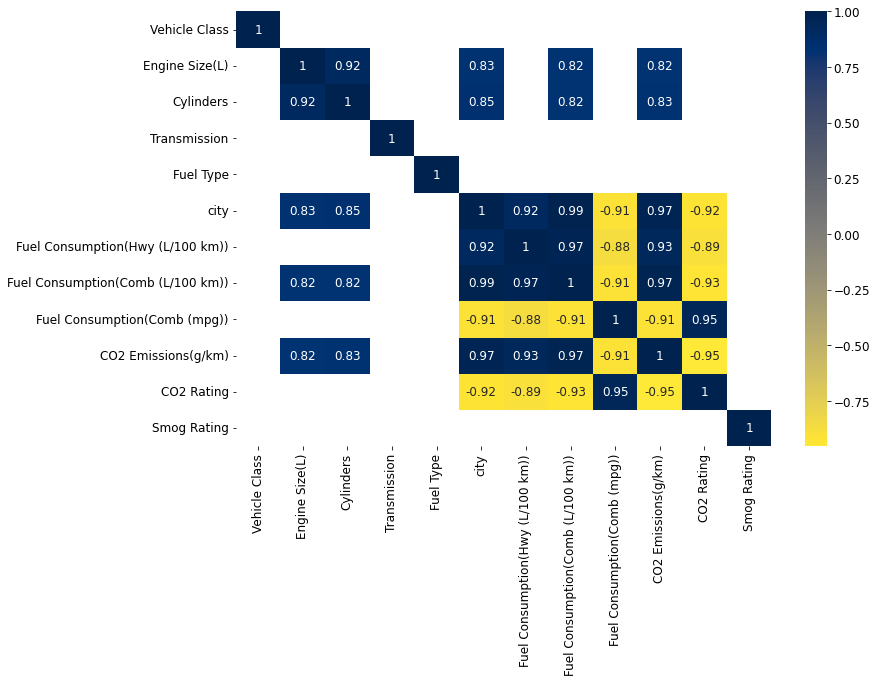

In [55]:
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

<h6 style="color:green">After Data Preprocessing</h6>

- No Change on it

<h2 style="color:green"><center>Let start story telling process</center></h2>

**First Collect all Observation to create story**

<h6 style="color:red">Categorial</h6>

 'Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'

<h6 style="color:red">Numerical</h6>

 'Model Year',
 'Engine Size(L)',
 'Cylinders',
 'Fuel Consumption (City (L/100 km)',
 'Fuel Consumption(Hwy (L/100 km))',
 'Fuel Consumption(Comb (L/100 km))',
 'Fuel Consumption(Comb (mpg))',
 'CO2 Emissions(g/km)',
 'CO2 Rating',
 'Smog Rating'
 
<h6 style="color:red">No of Items and Height</h6>
 
 - In our Dataset More vehicles are ford and Less Vehicles are Flat
 
 - Z Type fuel using is higher in dataset
 
 - A8 Transmission Vehicles are 10.6% and AS10 are 9.2%
 
 - SUV small are 20.8%
 
 - SUV standard are 14.9%
 
 - pickup truck Standard 11.9%
 
<h6 style="color:red">vehicle class with fuel consumption</h6>

 - PickUp truck Standard consuming more Fuel 8.9
 - SUV 8.3
 - Two setter 8.6
 
<h6 style="color:red">Transmission with fuel consumption</h6>

- A6 Transmission consumnes high 6.0%

<h6 style="color:red">Fuel Type with fuel consumption</h6>

- 35.5 percentage of Fuel is E

<h6 style="color:red">Observed in Paitplot</h6>

-  No of Cylinders increases Fuel consumption also increases, if 15 cylinders it take 25 liters for 100km and 5 to 10 cylinders means it consume near 5 to 17 liters.
  - Engine Size increases Fuel consumption also increases
  - Full consumption is less means Co2 Rating is Good
  - Full consumption is less then Smog Rating is Good
  - Full consumption increases Co2 emission in also Increases in Gram/km
  
<h6 style="color:red">High co-orelation with target feature</h6>

  - Co2 Emission and Cylinders have High correlation to FuelConsumption
  - Engine Size and Co2 has same coorelation 0.82 so I negleted Engine size

<h3 style="color:green"><center>Visualization Story</center></h3>

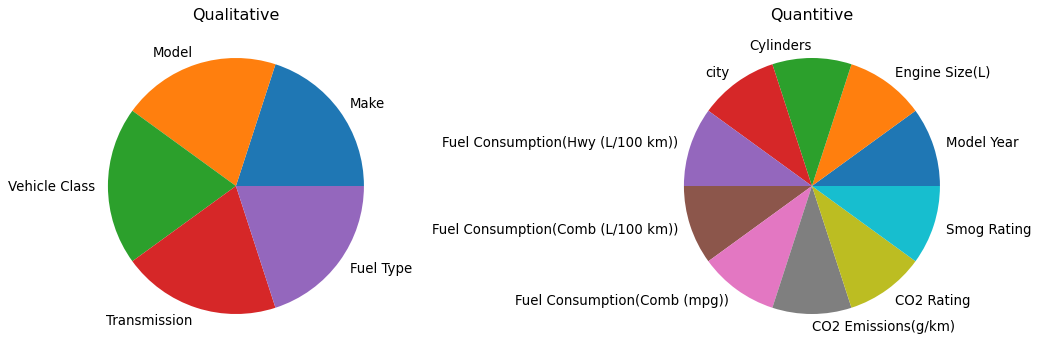

In [56]:
plt.figure(figsize=(4, 4), dpi=80)
plt.subplots_adjust(left=0.5,bottom=1,right=3.5,top=2,wspace=0.5,hspace=None)

plt.subplot(1,2,1)     # It is Refering Postion
plt.pie(x=[1,1,1,1,1],labels=obj)
plt.title("Qualitative")

plt.subplot(1,2,2)    # It is Refering Postion
plt.pie(x=[1,1,1,1,1,1,1,1,1,1],labels=num)
plt.title("Quantitive")
plt.show()

**Our Promblem is to find out the which feature consuming the more fuel so let check which fuel type is majority in our data set**

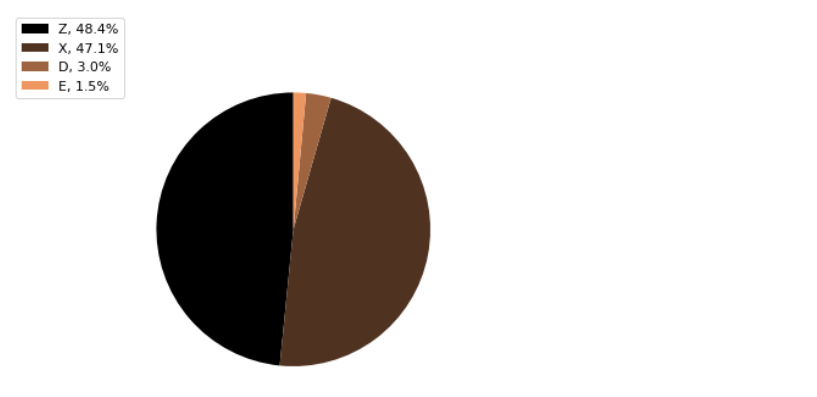

**Perium Gasoline["Z"] type is highest in our dataset**

**Did Gasoline using vehicles using more fuel consumption No Etahol Using Vehicles are Consumning more fuel**

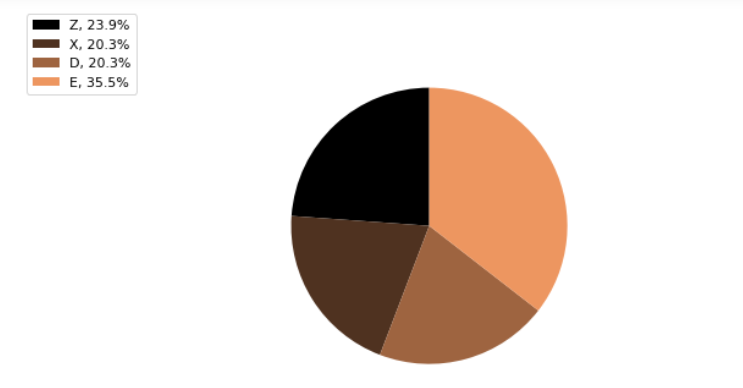

**We can Observe Fuel Type X,D and Z are Less Consume compare to E !Ok We know that Z Fuel Using Vehicles are Highes in our dataset but more amount Fuel consumption tye is E**

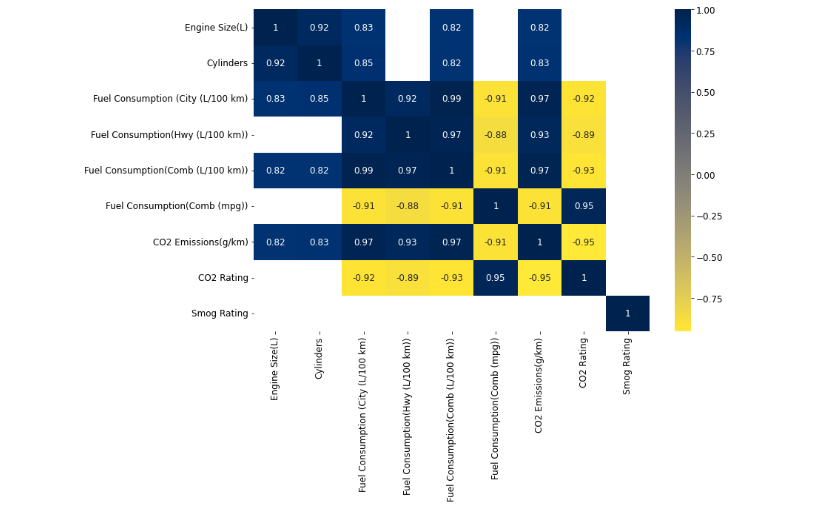

**As we seen Cylinders and Co2 Emission have high correlation with the target variable and Cylinder and Co2 have same co-orelation so we negelted it**

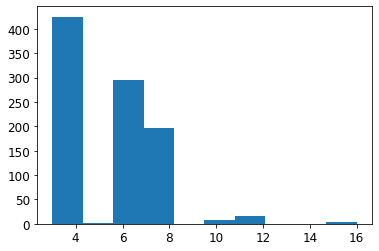

In [57]:
x=df["Cylinders"]
plt.hist(x)
plt.show()

**In 4 cylinder vehicles high in our dataset**  

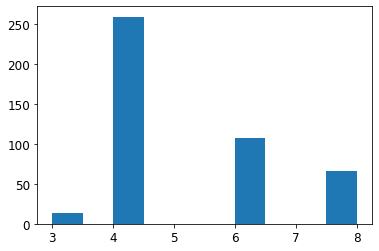

In [58]:
x=df[df["Fuel Type"]=="X"]["Cylinders"]
plt.hist(x)
plt.show()

**4 cylinder vehicles are most using  X Fuel** 

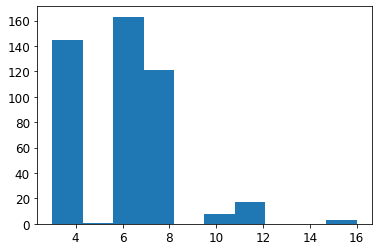

In [59]:
x=df[df["Fuel Type"]=="Z"]["Cylinders"]
plt.hist(x)
plt.show()

**z type fuel balancing** 

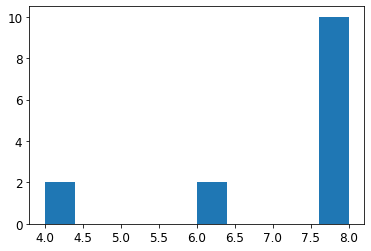

In [60]:
x=df[df["Fuel Type"]=="E"]["Cylinders"]
plt.hist(x)
plt.show()

**E-type vehicles more using the 8 Cylinders**

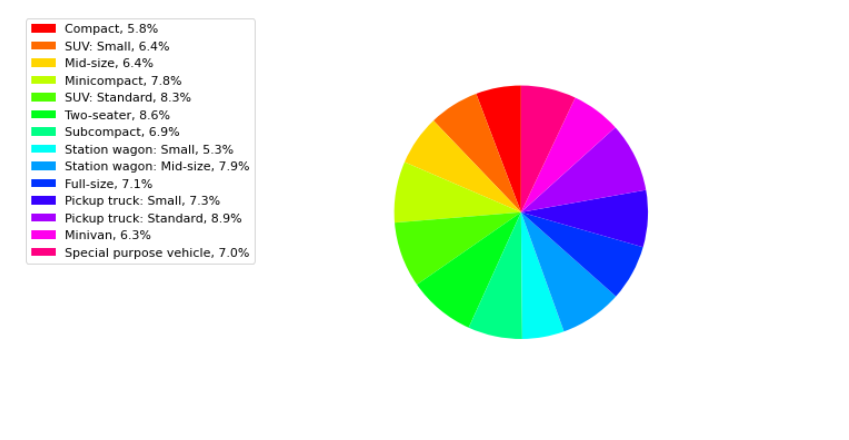

**Highest Fuel Consuming Vehicels class are "PickUp standard" and SUV, Two Seater**

In [61]:
x=df[df["Cylinders"]>=8]["Vehicle Class"].unique()
x

array(['Minicompact', 'SUV: Standard', 'Two-seater',
       'Station wagon: Mid-size', 'Mid-size', 'Full-size', 'Subcompact',
       'Pickup truck: Standard', 'SUV: Small', 'Compact'], dtype=object)

<h6 style="color:blue">Data Prepartion</h6>

In [62]:
X = df_copy[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]
y = df_copy[['Fuel Consumption(Comb (L/100 km))']]
X.shape,y.shape

((946, 8), (946, 1))

In [63]:
X

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,2.4,4,7,3,200,6,3
1,7,3.5,6,8,3,263,4,5
2,7,2.0,4,8,3,232,5,6
3,7,2.0,4,8,3,242,5,6
4,0,2.0,4,8,3,230,5,7
...,...,...,...,...,...,...,...,...
941,7,2.0,4,12,3,219,5,5
942,7,2.0,4,12,3,219,5,5
943,7,2.0,4,12,3,232,5,7
944,8,2.0,4,12,3,236,5,5


<h3 style="color:brown">Model :</h3>

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (756, 8) (756, 1)
Test set: (190, 8) (190, 1)


In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
model.intercept_

array([0.06231241])

In [67]:
model.coef_

array([[ 0.00066058,  0.13549093, -0.01479244,  0.00789365, -0.03712664,
         0.04138051, -0.0418067 ,  0.03372079]])

**Prediction**

In [68]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

<h3 style="color:brown">Evaluation :</h3>

In [69]:
from sklearn.metrics import mean_squared_error
test_RMSE =np.sqrt(mean_squared_error(y_test,test_pred))
train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
print(test_RMSE,train_RMSE)

0.5938690166819434 0.6873668226930023


In [70]:
model.score(X_train,y_train)

0.9402143178088415

In [71]:
model.score(X_test,y_test)

0.9636159473257309